In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import plotnine

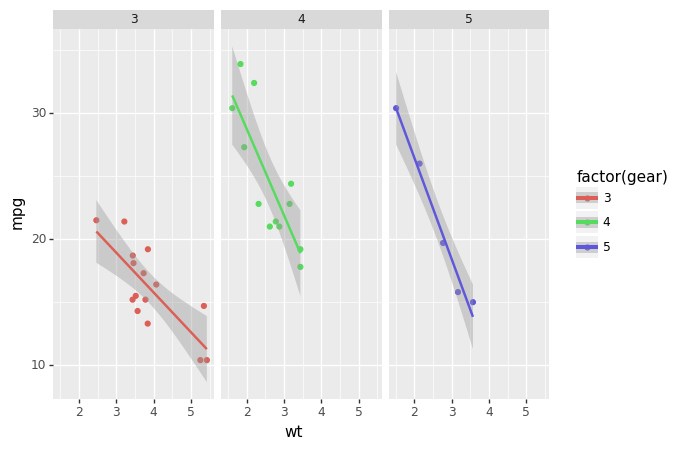

<ggplot: (672640835)>

In [48]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars

(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))

In [14]:
cities = pd.read_csv("minard_cities.txt", sep=" ", names=["lon", "lat", "city"])
temperatures = pd.read_csv("minard_temperature.txt", sep=" ", names=["lon", "temp", "days", "day"])
troops = pd.read_csv("minard_troops.txt", sep=" ", names=["lon",  "lat", "survivors" , "direction", "division"])

In [19]:
temperatures["label"] = temperatures.fillna("").apply(
    axis=1, func=lambda row: "{}° {}".format(row[1], row[3].replace("-", " "))
)
troops = troops.sort_values(by=["division", "survivors"], ascending=False)

In [62]:
#troops

In [63]:
temperatures

,lon,temp,days,day,label
0,37.6,0,6,Oct-18,0° Oct 18
1,36.0,0,6,Oct-24,0° Oct 24
2,33.2,-9,16,Nov-9,-9° Nov 9
3,32.0,-21,5,Nov-14,-21° Nov 14
4,29.2,-11,10,NaN,-11°
5,28.5,-20,4,Nov-28,-20° Nov 28
6,27.2,-24,3,Dec-1,-24° Dec 1
7,26.7,-30,5,Dec-6,-30° Dec 6
8,25.3,-26,1,Dec-7,-26° Dec 7


In [ ]:
p = (ggplot(temperature))

/Users/sneeley/opt/anaconda3/lib/python3.9/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/Users/sneeley/opt/anaconda3/lib/python3.9/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


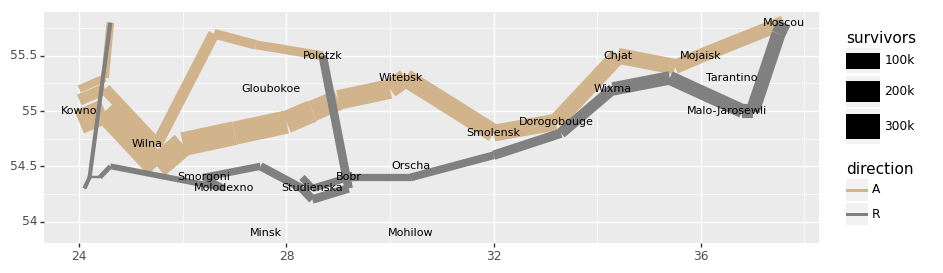

In [61]:
plotnine.options.figure_size=(10,3)

p = (ggplot(troops, aes('lon','lat')) +
               geom_path(aes(size='survivors', color='direction', group = 'division')))

p = (p + geom_text(aes(label='city'), size=8, data=cities))
               

p = p + scale_size(range=[1, 10], breaks=[1e5, 2e5, 3e5],
                                   labels=['100k', '200k', '300k']) + \
            scale_color_manual(values=['tan', 'grey']) + \
            labs(x=None, y=None)

print(p)

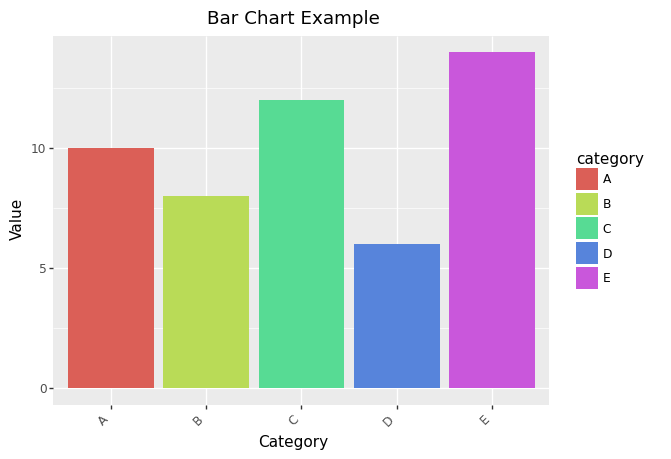

In [45]:
import pandas as pd
from plotnine import *

# create example data
data = pd.DataFrame({
    'category': ['A', 'B', 'C', 'D', 'E'],
    'value': [10, 8, 12, 6, 14]
})

# create plot object
p = ggplot(data, aes(x='category', y='value', fill='category'))

# add bar layer
p += geom_bar(stat='identity')

# customize plot
p += labs(title='Bar Chart Example', x='Category', y='Value')
p += theme(axis_text_x=element_text(rotation=45, hjust=1))

# display plot
print(p)


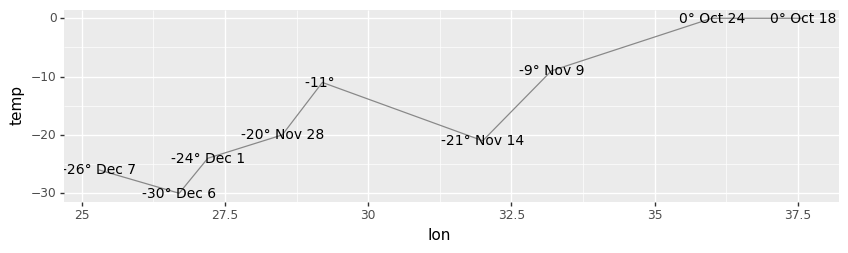

In [71]:
from plotnine import *

temperatures_chart = (ggplot(temperatures, aes(x='lon', y='temp')) +
                     geom_line(color='#888888') +
                     geom_text(aes(label='label'), 
                               #fontfamily='Cardo', 
                               size=10, 
                               #nudge_x=5, 
                               #nudge_y=20
                              ) +
                     theme_grey() +
                     labs(x='lon') +
                     ylim(temperatures['temp'].min(), temperatures['temp'].max()) +
                     coord_cartesian())
                     
# Adjust chart height
temperatures_chart = temperatures_chart + theme(
    figure_size=(10, 2.5)
)
print(temperatures_chart)